# Explore D2_Achilles_gene_dep_scores.tsv 

## Abstract
- 14.3% of values are missing 
- given we have 16756 genes and roughly 502 cell lines we should consider dropping genes with lots of missing values. Given the small number of cell lines dropping data is probably a bad idea, if anything we should consider imputing missing values
- the filtering code in this notebook has been refactor into DEMETER2.dataFactory._clean()


## Estimating the number of genes to remove:
Table bellow shows how many genes would be dropped if we removed all genes missing greater than 'percent' missing values. The following table is copied from bellow. See histograms bellow. It seems 5604 of our 16756 are very sparse. The remain genes are very dense. We should consider imputing the missing values for dense genes. 


```
percent:0.5  numToDrop   34
percent:0.4  numToDrop 5555
percent:0.25 numToDrop 5562
percent:0.1  numToDrop 5562
percent:0.05 numToDrop 5562
percent:0.01 numToDrop 5604
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import describe

In [2]:
dataFile="data/D2_Achilles_gene_dep_scores.tsv"
dataRawStrs = np.loadtxt(dataFile, dtype=str, delimiter="\t")

## Parse data
strip off the headers and row names

In [3]:
print(dataRawStrs.shape)
print()
print(dataRawStrs[0,0:5])
print(dataRawStrs[0,1:5])

(16756, 502)

['""' '"143B_BONE"' '"22RV1_PROSTATE"' '"2313287_STOMACH"'
 '"697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"']
['"143B_BONE"' '"22RV1_PROSTATE"' '"2313287_STOMACH"'
 '"697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE"']


In [4]:
cellLines = dataRawStrs[0,1:]
print(cellLines.shape)
print(cellLines[0:3])

(501,)
['"143B_BONE"' '"22RV1_PROSTATE"' '"2313287_STOMACH"']


In [5]:
print(dataRawStrs[0:5,0])
print(dataRawStrs[1:5, 0])

['""' '"A1BG (1)"' '"NAT2 (10)"' '"ADA (100)"' '"CDH2 (1000)"']
['"A1BG (1)"' '"NAT2 (10)"' '"ADA (100)"' '"CDH2 (1000)"']


In [6]:
genNames = dataRawStrs[1:,0]
print(genNames.shape)
print(genNames[0:3])

(16755,)
['"A1BG (1)"' '"NAT2 (10)"' '"ADA (100)"']


In [7]:
dataStr = dataRawStrs[1:, 1:]
print(dataStr.shape)
print(dataStr[0:2, 0:2])

(16755, 501)
[['0.0524661469433624' '-0.115242032403861']
 ['0.0841725922071565' '0.000951246047267534']]


## Explore missing values

In [8]:
missing = dataStr == 'NA' 
print(missing.shape)
print(missing[0:3, 0:3])
originalPercentMissing = np.sum(missing, axis=None)/ np.size(missing)
print( "precent missing: {}%".format(originalPercentMissing) )

(16755, 501)
[[False False False]
 [False False False]
 [False False False]]
precent missing: 0.14348396611730285%


In [9]:
present = missing == False
print(present.shape)
print(present[0:3, 0:3])

(16755, 501)
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [10]:
# def findTopN(a, topN):
#     '''
#     https://stackoverflow.com/a/23734295
    
#     a is an 1d array
    
#     TODO make this work for matrix
#     '''
#     ret = np.argpartition(a, -topN)[-topN:]
#     return ret
    
# not convinced this works, 
# our array is small, just use argsort(). It is easier to undertsand

# c = np.array( [5, 3, 6, 7, 1, 2, 8, 9, 4] )
# top4Idx = findTopN(c, 4)
# print(top4Idx)
# print( c[top4Idx] )

In [11]:
def exploreLogicalImpl(R, axis, title="aedwip2"):
    print()
    print(title)
    RSums = np.sum(R, axis=axis)
    print(RSums.shape)
    
    print()
    sortIdx = np.argsort(RSums)[-200:]
    print("sortIdx:\n{}".format(sortIdx))    
    print("top values:\n{}".format(RSums[sortIdx]))    
    
    # s = RSums.shape
    # RSums = RSums.reshape( (s[0], -1) )
    RSumDescr = describe(RSums)
    print()
    print(RSumDescr)
    RSumNobs, RSumminMax, RSummean, RSumvariance, RSumskewness, RSumkurtosis = RSumDescr
    
    print()
    RSumsMin = RSumminMax[0]
    RSumsMax = RSumminMax[1]
    print("min:{} max:{}".format(RSumsMin, RSumsMax))
    print( "RSumsMax - RSumsMin = {}".format(RSumsMax - RSumsMin))
    

    numBins = (RSumsMax - RSumsMin) // 5
    hTitle = "{} numBins:{}".format(title, numBins)
    n, bins, patches = plt.hist(RSums, bins=numBins)
    plt.title(hTitle)
    plt.show()

In [12]:
def exploreLogical(R, title="aedwip"):
    print(R.shape)
    print(R[0:3, 0:3])
    cols = 0
    exploreLogicalImpl(R, axis=cols, title="{} cols".format(title))
    
    rows = 1
    exploreLogicalImpl(R, axis=rows, title="{} rows".format(title))

## aedwip

looks like many cols have the same number of missing value. suggest may there are genes we should remove?

```
missing cols
(501,)
adwip
aedwip topIdx:
[  7   6 498  33 373 374 375  68   1  32 443 381  63  62 384 385   3 442
 441   5 388 481  54  52 429  21 417 432  23 419 462 453 460 452 458  41
 421 422 423 424 371 425 426 457  20  45 467 403 404 405 480 478 406  14
  15 407  51  50 449 411  39 451  18 470  19  47  53 370 179 368 157 156
 230 154 233 234 236 238 239 240 242 244 226 151 248 254 143 142 140 139
 138 262 369 132 270 130 247 225 224 159 183 176 188 189 192 173 172 195
 196 171 198 169 165 206 164 208 163 210 211 212 213 215 217 160 219 220
 221 127 275 135 277  94 324 276 329  85  84 337 339  82 345 346 347 349
 352 353 354  74  73 358 359 360  72 362 363  71 365 367  95 321 327 500
 116 299 111 288 125 105 309 283 293 310 281 104 279 278 103 315  97 282
 118  35 185  64 427 459 202  96 304 412 180 474 237 471 396 468 235 232
 356 112]
aedwip top values:
[5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528
 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5565
 5565 5565 5565 5565 5565 5565 5565 5565 5565 5565 5565 5565 5565 5565
 5565 5565 5565 5565]
 ```

(16755, 501)
[[False False False]
 [False False False]
 [False False False]]

missing cols
(501,)

sortIdx:
[  7   6 498  33 373 374 375  68   1  32 443 381  63  62 384 385   3 442
 441   5 388 481  54  52 429  21 417 432  23 419 462 453 460 452 458  41
 421 422 423 424 371 425 426 457  20  45 467 403 404 405 480 478 406  14
  15 407  51  50 449 411  39 451  18 470  19  47  53 370 179 368 157 156
 230 154 233 234 236 238 239 240 242 244 226 151 248 254 143 142 140 139
 138 262 369 132 270 130 247 225 224 159 183 176 188 189 192 173 172 195
 196 171 198 169 165 206 164 208 163 210 211 212 213 215 217 160 219 220
 221 127 275 135 277  94 324 276 329  85  84 337 339  82 345 346 347 349
 352 353 354  74  73 358 359 360  72 362 363  71 365 367  95 321 327 500
 116 299 111 288 125 105 309 283 293 310 281 104 279 278 103 315  97 282
 118  35 185  64 427 459 202  96 304 412 180 474 237 471 396 468 235 232
 356 112]
top values:
[5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5528 5

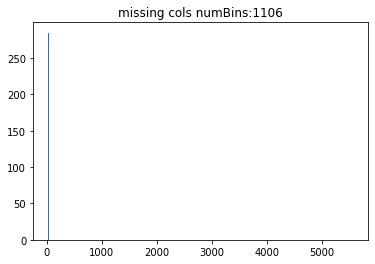


missing rows
(16755,)

sortIdx:
[ 2784  2785 12212 12239 12241 12263 12262 12261 12618  3019 12619  5458
  8654 12254  3023  5456  3026  3027 12248  3028 12245 12244 12243 12621
  3031  8672 12210  5560  3064 12184  3065  3066 12181  3067 12628 12179
  5442  3070  8680 12174  8681  3073  2780  3074  5440  8683  8684 12186
  3063  8677 12189 12208 12207  3050 12205  3051 12203  2781  3052  8673
  3016  3054  3055  3056  8674 12196 12195 12194  3058  3059  8676 12627
  2825  3015  3014 12344  2972 12341 12340 12339 12338 12337  2974  2789
 12335 12334 12333  2975 12330  8634  2979 12326 12324 12615  2971 12323
 12346 12348 12371 12370  2959  2960  2961  2962  2964  2965 12359  2791
  2968  5557 12356 12355 12354 12353 12352 12351 12350  2970 12322  2981
  2982 12289  3005 12285 12284  3006  2787 12282  5464  3008 12279  3010
 12275 12274 12273  3012 12271 12270  5461 12268  3002 12291  2999  2998
 12319  2983  2984 12316  8636  2986  2988  2989 12310 12266  2990  2992
  2993 12302 12301

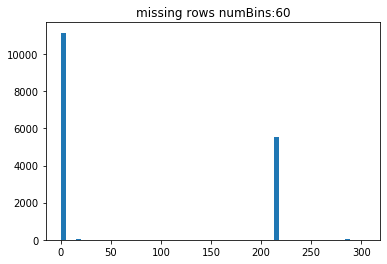

In [13]:
exploreLogical(missing, title="missing")

In [20]:
def findGenesWithLotsOfMissingData(missing, percent):
    """
    input:
        missing: a logical matrix. one means value is missing, else zero
        
        precent: identify genes that are missing greater than percent values
        
    returns:
        logical vector.
    """
    rows, cols = missing.shape
    print(missing.shape)
    
    rowAxis = 1
    missingSums = np.sum(missing, axis=rowAxis)
    print(missingSums.shape)
    
    percentMissing = missingSums / (1. * cols) # make sure denominator is a real num
    idx = np.argsort(percentMissing)[-50:]
    print(idx)
    print()
    print(missingSums[idx])
    print()
    print(percentMissing[idx])

    print()
    dropLogical = percentMissing > percent
    print("\npercent:{} numToDrop{}".format(percent, np.sum(dropLogical))) 
    print(missingSums[dropLogical])
    
    return dropLogical

dropLogical = findGenesWithLotsOfMissingData(missing, percent=0.50)

print()
print(dropLogical[0:5])

(16755, 501)
(16755,)
[ 2988  2989 12310 12266  2990  2992  2993 12302 12301  2996 12299 12298
 12297  2788 12307  2823  1330 16036 11180 15577 10260 16315 16399 14117
  5133  1809 16437 13015  5752 16216  6666  8889 12357   920 16683  8057
  3347  5625  8052  7739  9039 13801  5314 11413  6444 11396 16096  1549
  5313 12209]

[216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 285 285
 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285
 285 285 285 285 285 285 285 285 285 285 285 285 304 304]

[0.43113772 0.43113772 0.43113772 0.43113772 0.43113772 0.43113772
 0.43113772 0.43113772 0.43113772 0.43113772 0.43113772 0.43113772
 0.43113772 0.43113772 0.43113772 0.43113772 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.568862

## Candidate Genes to Drop

```
percent:0.5 numToDrop 34
[285 285 285 285 285 285 304 285 285 285 285 285 285 285 285 285 285 285
 285 285 285 304 285 285 285 285 285 285 285 285 285 285 285 285]
```
- percent:0.4 numToDrop 5555

```
percent:0.25 numToDrop 5562
[216 216 216 ... 216 216 216]
```

```
percent:0.1 numToDrop 5562
[216 216 216 ... 216 216 216]
```

```
percent:0.05 numToDrop 5562
[216 216 216 ... 216 216 216]
```

```
percent:0.01 numToDrop 5604
[216  19 216 ... 216 216 216]
```

## does data improve if we remove genes?
hello {{ originalPercentMissing }} % of values in the raw data are 'NA'. What percentage of values are 'NA' if we remove? 

In [18]:
dropLogical = findGenesWithLotsOfMissingData(missing, percent=0.05)
numGenesToDrop = np.sum(dropLogical)

# dataStr is the raw data with out the cellLineNames or geneNames
print(dataStr.shape)
print("numGenesToDrop:{}".format(numGenesToDrop))

selectLocical = dropLogical == False
cleanData = dataStr[selectLocical,:]
print("clean data.shape:{}".format(cleanData.shape))
print("size of clean data:{}".format(np.size(cleanData)))

# print("check: numGenesToDrop:{} + cleanData.shape[0]:{} == {} == missing.shape[0] == {}"
#          .format(numGenesToDrop, cleanData.shape[0], 
#                  (numGenesToDrop + cleanData.shape[0]),
#                  missing.shape[0] ))

assert((numGenesToDrop + cleanData.shape[0]) == missing.shape[0])

# calculate % 'NA' in cleanData
missingFromClean = cleanData == 'NA' 

percentMissingFromClean = np.sum(missingFromClean) / np.size(cleanData)
print()
print("percent missing from clean data:{}".format(percentMissingFromClean))
print("percent of genes dropped:{}".format( 1 - cleanData.shape[0]/ dataStr.shape[0]))

(16755, 501)
(16755,)
[ 2988  2989 12310 12266  2990  2992  2993 12302 12301  2996 12299 12298
 12297  2788 12307  2823  1330 16036 11180 15577 10260 16315 16399 14117
  5133  1809 16437 13015  5752 16216  6666  8889 12357   920 16683  8057
  3347  5625  8052  7739  9039 13801  5314 11413  6444 11396 16096  1549
  5313 12209]

[216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 285 285
 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285 285
 285 285 285 285 285 285 285 285 285 285 285 285 304 304]

[0.43113772 0.43113772 0.43113772 0.43113772 0.43113772 0.43113772
 0.43113772 0.43113772 0.43113772 0.43113772 0.43113772 0.43113772
 0.43113772 0.43113772 0.43113772 0.43113772 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228
 0.56886228 0.56886228 0.56886228 0.56886228 0.56886228 0.568862